# Growth data in piperacillin

This data is reported in tidy-table style. 

* row: int, the row on the 96-well micro-plate where the population was growing
* col: int, the column on the 96-well micro-plate where the population was growing
* day: int, 0 or 1
* population_id: str, a unique identifier for a given population
* piperacillin (ug/ml): the concentration of piperacillin in which the microbes are grown
* measurement_type: CFP, YFP, RFP, OD, fraction
* measurement_value: the value that was measured for the corresponding measurement_type

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./data/piperacillin.csv')

In [10]:
df.head()

,row,col,day,population_id,piperacillin (ug/ml),measurement_type,measurement_value
0,0,0,0,0|0,0,CFP,8.497
1,0,1,0,0|1,0,CFP,11.550
2,0,2,0,0|2,0,CFP,14.040
3,0,3,0,0|3,0,CFP,16.340
4,0,4,0,0|4,0,CFP,19.800


In [4]:
fraction_data = df[df.measurement_type == 'fraction']

In [5]:
day_0_fraction = fraction_data[fraction_data.day == 0]
day_1_fraction = fraction_data[fraction_data.day == 1]
viable_populations = df[(df.measurement_type == 'OD') & (df.day == 1) & (df.measurement_value > 0.3)].copy()
viable_populations['population_survived'] = 1

In [6]:
merged_df = pd.merge(day_1_fraction, day_0_fraction[['measurement_value', 'population_id']], on='population_id', how='left', suffixes=['_1', '_0'])
merged_df_with_od = pd.merge(merged_df, viable_populations[['population_survived', 'population_id']], on='population_id', how='left')

In [7]:
merged_df_with_od['population_survived'] = merged_df_with_od['population_survived'].fillna(0)

In [8]:
final_df = merged_df_with_od[merged_df_with_od['population_survived'] == 1]

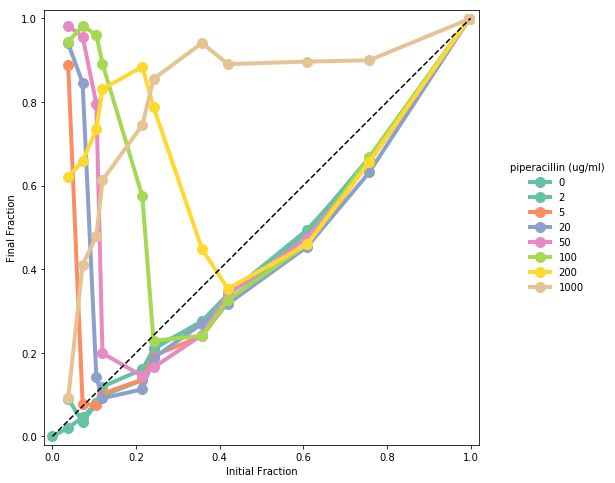

In [9]:
figure(figsize=(8, 8))
ax = subplot(aspect=1)

colors = cm.Set2(linspace(0, 1, 10))

concentrations = sorted(list(set(final_df['piperacillin (ug/ml)'].unique())))

for idx, pip_conc in enumerate(concentrations):
    sub_df = final_df[final_df['piperacillin (ug/ml)'] == pip_conc]
    ax.plot(sub_df['measurement_value_0'], sub_df['measurement_value_1'], 
            label=pip_conc, marker='o', linewidth=4, markersize=10, color=colors[idx])
    
xx = linspace(0, 1, 10)
ax.plot(xx, xx, '--k')
ax.set_ylabel('Final Fraction')
ax.set_xlabel('Initial Fraction')
    
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
legend(loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False, title='piperacillin (ug/ml)')
